<a href="https://colab.research.google.com/github/StephaneWamba/Resume-Screening/blob/main/Resume_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Introduction: Resume Screening Application**
**Overview**
In the fast-paced world of recruitment, efficiently screening resumes is a crucial step in the hiring process. This project aims to develop an automated resume screening application that leverages machine learning techniques to classify resumes into various categories based on their content. Such an application assists recruiters in managing the large volume of applications they receive, enabling them to quickly identify the most promising candidates.

**Objective**
The primary objective of this project is to create a machine learning model that can accurately categorize resumes into different professional fields. This involves several key steps: preprocessing and cleaning text data, performing exploratory data analysis to understand underlying patterns, engineering relevant features from resume content, developing and tuning a machine learning model, and finally, deploying this model in an interactive web application using Streamlit.

**Data Source**
The dataset used for this project is sourced from Kaggle, specifically from the "Resume Dataset" by Gaurav Dutta (https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset). This dataset comprises a collection of 962 resumes, categorized into various professional fields. Each resume includes diverse information such as educational background, skills, work experience, and other relevant details.

Significance
Automating the initial stages of resume screening can significantly reduce the workload on human recruiters, allowing them to focus on more nuanced aspects of the recruitment process. By accurately categorizing resumes, the application can streamline the candidate selection process, potentially increasing the efficiency and effectiveness of hiring.

**Project Structure**
The project will be structured into several phases: data loading and cleaning, exploratory data analysis, feature engineering, model development and evaluation, and finally, deployment using Streamlit. Each phase will be thoroughly documented to provide insights into the development process and decision-making at each step.

**Expected Outcomes**
By the end of this project, we aim to have a fully functional web application that can receive a resume as input and categorize it into the appropriate professional field. This application will serve as a valuable tool for recruiters and a significant portfolio piece demonstrating the practical application of machine learning in real-world scenarios.

### Data Collection and Loading


In [133]:
import pandas as pd

# Path to the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Resume Screening/UpdatedResumeDataSet.csv'  # Replace with the path to your CSV file

# Load the dataset
resume_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(resume_data.head())

# Display basic information about the dataset
print(resume_data.info())


       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


The dataset contains 962 resumes, categorized under different professional fields in the 'Category' column. Each 'Resume' entry comprises a mix of textual information like skills and education details. Notably, there are special characters (e.g., â¢) indicative of encoding issues, necessitating text cleaning. The absence of null values in both columns is a positive indicator of data completeness.

Key steps ahead include data cleaning to remove special characters and standardizing text format, followed by exploratory analysis and feature engineering for model development.

### Data Cleaning and Preprocessing
In this phase, we focus on cleaning the resume texts to enhance data quality.

The primary tasks include:

* Removing Special Characters: The dataset contains special characters (like â¢), likely due to encoding issues. These characters need to be removed or corrected to avoid interference with text analysis.

* Standardizing Text Format: Converting all text to a consistent format, such as lowercase, to ensure uniformity in the data.

* Handling Whitespaces: Removing any extraneous whitespaces, including line breaks and tabs, which are common in text data.

* Optional - Stopword Removal: Depending on the specific requirements of the analysis, common stopwords (frequent but often irrelevant words in English) could be removed to focus on more meaningful words in the resumes.

In [134]:
import pandas as pd
import re

# Function to clean the resume text
def clean_text(text):
    # Removing special characters and digits
    cleaned_text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Converting to lowercase
    cleaned_text = cleaned_text.lower()

    # Removing extra whitespaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text

# Apply the cleaning function to the resume data
resume_data['Cleaned_Resume'] = resume_data['Resume'].apply(clean_text)

# Display the first few cleaned resumes
print(resume_data[['Category', 'Cleaned_Resume']].head())


       Category                                     Cleaned_Resume
0  Data Science  skills programming languages python pandas num...
1  Data Science  education details may to may b e uit rgpv data...
2  Data Science  areas of interest deep learning control system...
3  Data Science  skills r python sap hana tableau sap hana sql ...
4  Data Science  education details mca ymcaust faridabad haryan...


**Data Cleaning Insights**

The data cleaning of the resume dataset led to several observations:

* **Unusual Word Occurrences:** The cleaning process, which removed special characters and formatting, resulted in some unexpected words like "uit" or "sap." This is likely due to the merging of words or the isolation of abbreviations from their original context.

* **Contextual Relevance**: Some terms, such as "UIT" or "SAP," while seeming out of place, are actually relevant in specific contexts. Their appearance post-cleaning underscores the challenges of automated text processing.

* **Place Names and Specific Terms**: Names like "Faridabad" remain in the text. These terms, though not directly related to skills or experience, are part of personal information and have varying relevance depending on the project goals.

These points highlight the complexities of text cleaning in datasets with di

### Exploratory Data Analysis
In this phase, we delve into the dataset to extract insights and identify patterns. Key areas of focus in EDA include:

* **Category Distribution**: Understanding how resumes are distributed across different categories helps in identifying if certain fields are over- or under-represented.
* **Common Words and Phrases**: Identifying frequently occurring words and phrases can give insights into prevalent skills and qualifications.
* **Word Clouds:** Visual representation of common words in the dataset, providing an intuitive understanding of the data.
* **Length Analysis**: Examining the length of resumes (word count) to identify any trends or outliers.
* **Preliminary Text Analysis:** A basic text analysis to gauge the nature of content in the resumes.

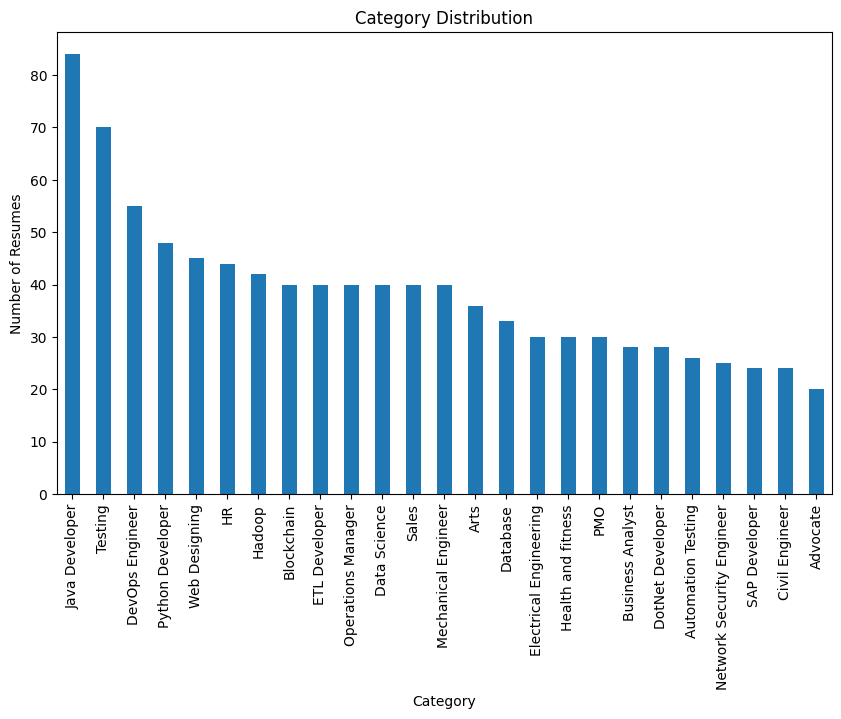

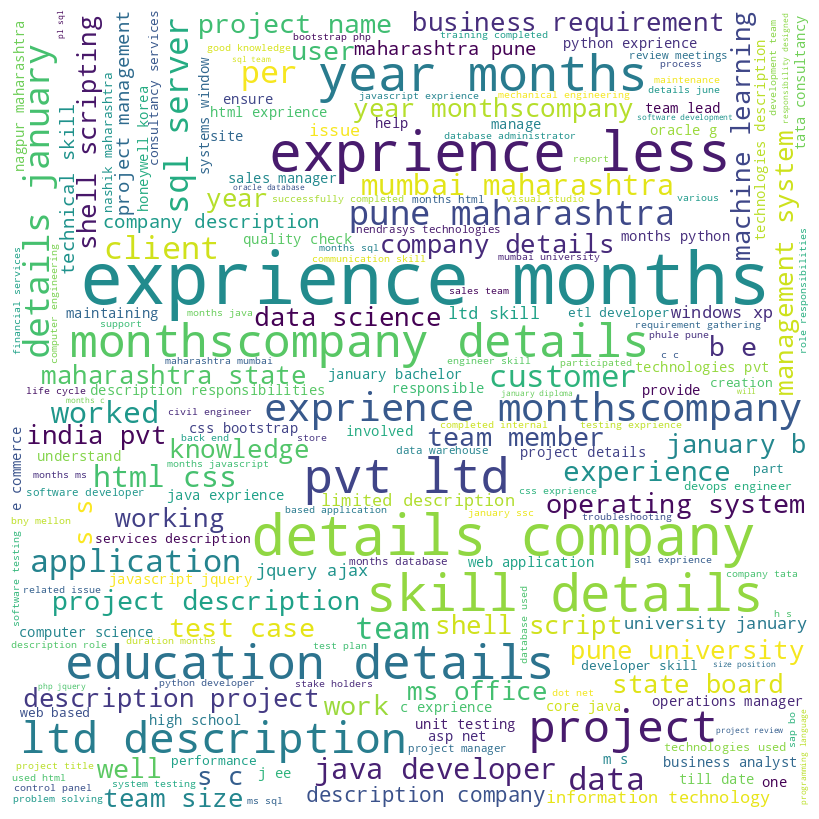

In [135]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Category Distribution
plt.figure(figsize=(10,6))
resume_data['Category'].value_counts().plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Resumes')
plt.show()

# Word Cloud for the entire dataset
all_text = ' '.join(resume_data['Cleaned_Resume'])
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


**Category Distribution Summary**

The bar chart depicts how resumes are spread across job categories, highlighting a diversity of professions. 'Java Developer' is the most prevalent category, with 'Testing' and 'DevOps Engineer' also common. This variety is advantageous for creating a comprehensive resume screening tool.

Higher frequencies in certain categories suggest where to focus model training efforts, and the varied representation may necessitate balanced sampling methods to ensure model accuracy across less common categories.

**Word Cloud Summary**

The word cloud highlights key terms such as "experience," "project," and "company," emphasizing their frequency in the resumes. This indicates a focus on work experience and technical skills among candidates. The presence of terms like "SQL" and "Java" reveals common technical competencies.

These findings will aid in identifying significant features for resume categorization and guide the development of the screening model.

**Keyword Extraction Using NLP Techniques:**

We use Named Entity Recognition (NER) to identify entities like skills or technologies.

In [136]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MultiLabelBinarizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to extract named entities as keywords
def extract_keywords_nlp(text):
    words = word_tokenize(text)
    tagged_words = nltk.pos_tag(words)
    named_entities = [word for word, tag in tagged_words if tag in ('NN', 'NNP', 'NNS', 'NNPS')]
    return named_entities

# Apply NER to extract keywords
resume_data['Keywords'] = resume_data['Cleaned_Resume'].apply(extract_keywords_nlp)

# Encode the keywords using MultiLabelBinarizer for use in modeling
mlb = MultiLabelBinarizer()
keywords_encoded = mlb.fit_transform(resume_data['Keywords'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [137]:
resume_data['Keywords']

0      [skills, languages, scipy, scikit, matplotlib,...
1      [education, details, e, uit, rgpv, data, scien...
2      [areas, interest, control, system, design, pyt...
3      [skills, sap, hana, tableau, sap, hana, sql, s...
4      [education, details, haryana, data, science, i...
                             ...                        
957    [computer, skills, proficient, office, word, p...
958    [willingness, challenges, learner, team, playe...
959    [skills, learner, eagerness, things, leadershi...
960    [computer, skills, software, knowledge, ms, po...
961    [skill, windows, database, mysql, sql, server,...
Name: Keywords, Length: 962, dtype: object

**Text vectorization**

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # You can adjust the number of max_features

# Fit and transform the cleaned resumes
X_tfidf = tfidf_vectorizer.fit_transform(resume_data['Cleaned_Resume'])


**Combining All Features:**

Now we'll combine the TF-IDF features, NER-extracted keywords and one-hot encoded categories into a single feature set for modeling.

In [139]:
from scipy.sparse import csr_matrix, hstack

# Convert the keywords_encoded to a sparse matrix
keywords_sparse = csr_matrix(keywords_encoded)

# Combine TF-IDF features, keyword features, years of experience
X_combined = hstack([X_tfidf, keywords_sparse])

print(type(X_combined))
print(X_combined.shape)

<class 'scipy.sparse._csr.csr_matrix'>
(962, 5272)


### Splitting the data

In [140]:
from sklearn.model_selection import train_test_split

# Assuming 'X_combined' is your complete feature set and 'resume_data['Category']' is the target variable
X = X_combined
y = resume_data['Category'].values

# Split the data into a training set and a testing set
# We'll use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Development

Here we will train our data on multiple ML modelsand evaluate the performance of each of them. Because our computational resources are limted, we cannot use optimizations techniques like grid search

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Initialize multiple classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Dictionary to hold evaluation metrics
metrics = {
    'Accuracy': {},
    'Precision': {},
    'Recall': {},
    'F1 Score': {}
}

# Train each model and gather metrics
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    metrics['Accuracy'][model_name] = accuracy_score(y_test, y_pred)
    metrics['Precision'][model_name] = precision_score(y_test, y_pred, average='weighted')
    metrics['Recall'][model_name] = recall_score(y_test, y_pred, average='weighted')
    metrics['F1 Score'][model_name] = f1_score(y_test, y_pred, average='weighted')


In [142]:
performance_array = pd.DataFrame(metrics)
performance_array


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.984456,0.986800,0.984456,0.982403
Multinomial Naive Bayes,0.963731,0.971208,0.963731,0.961308
Support Vector Machine,0.968912,0.977107,0.968912,0.967057
Random Forest,0.984456,0.986584,0.984456,0.982341


Given these results, **Logistic Regression** and **Random Forest** are strong candidates for your final model.

### Cross Validation

In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Initialize the Logistic Regression model
lr_model = LogisticRegression()

cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')

# Calculate and print the average and standard deviation of the cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_deviation = np.std(cv_scores)

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation: {std_deviation:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean Accuracy: 0.9959
Standard Deviation: 0.0083


High Mean Accuracy (99.59%): This suggests that the Logistic Regression model is highly effective in classifying the resumes correctly. Such a high accuracy indicates that the model has learned well from the features and is able to generalize its predictions effectively across different subsets of our data.

Low Standard Deviation (0.83%): The low standard deviation in the cross-validation scores indicates that the model's performance is consistent across different folds. This consistency is a good sign of the model's stability and reliability, suggesting that it is not overly fitted to a specific part of the data.

In [144]:
lr_model.fit(X_train, y_train)

LogisticRegression()

We save the models for deploying the app

In [145]:
from joblib import dump, load
from google.colab import files

dump(lr_model, 'logistic_regression_model.joblib')
dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')
dump(mlb, 'mlb.pkl')

files.download("logistic_regression_model.joblib")
files.download("tfidf_vectorizer.joblib")
files.download("mlb.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>